In [1]:
# imports
import scipy.io as sio
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import svm
import numpy as np
import pickle
import shap
shap.initjs()
import matplotlib as plt
import pandas as pd

In [2]:
# prepare data
filename = 'svm_model_data/xAI_data_2.mat'
data = sio.loadmat(filename)
X = data["X"]
y = data["y"]

# store in pandas dataframe
df = pd.DataFrame(X, columns = ['F1', 'F2', 'F3', 'F4'])
normalized_df = (df - df.mean())/df.std()
df = normalized_df

# split into training and test set
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.2, random_state=0)

# save data
pickle.dump(X_train, open('shap_explanation/X_train.sav', 'wb'))
pickle.dump(y_train, open('shap_explanation/y_train.sav', 'wb'))
pickle.dump(X_test, open('shap_explanation/X_test.sav', 'wb'))
pickle.dump(y_test, open('shap_explanation/y_test.sav', 'wb'))

In [3]:
# train model
my_model = sklearn.svm.SVC(kernel = 'rbf', probability = True, gamma = 2**3, C = 2**4)
my_model.fit(X_train, np.squeeze(y_train))

# save model
pickle.dump(my_model, open('shap_explanation/my_model.sav', 'wb'))

In [7]:
# load model and data
my_model = pickle.load(open('shap_explanation/my_model.sav', 'rb'))
X_train = pickle.load(open('shap_explanation/X_train.sav', 'rb'))
X_test = pickle.load(open('shap_explanation/X_test.sav', 'rb'))
y_train = pickle.load(open('shap_explanation/y_train.sav', 'rb'))
y_test = pickle.load(open('shap_explanation/y_test.sav', 'rb'))

In [5]:
# train explainer
explainer = shap.KernelExplainer(my_model.predict_proba, shap.kmeans(X_train, 2000), link = "logit")

# save explainer
pickle.dump(explainer, open('shap_explanation/explainer.sav', 'wb'))

Using 2000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [6]:
# prepare test data for shap_values computation
X_shap, _, y_shap, _ = train_test_split(X_test, y_test, test_size = 0.9)

In [7]:
# compute shap_values
shap_values = explainer.shap_values(X_shap)

# save shap_values
pickle.dump(shap_values, open('shap_explanation/shap_values.sav', 'wb'))

  0%|          | 0/919 [00:00<?, ?it/s]

In [8]:
# save shap data
pickle.dump(X_shap, open('shap_explanation/X_shap.sav', 'wb'))
pickle.dump(y_shap, open('shap_explanation/y_shap.sav', 'wb'))

In [9]:
# load explainer data and shap data
X_shap = pickle.load(open('shap_explanation/X_shap.sav', 'rb'))
y_shap = pickle.load(open('shap_explanation/y_shap.sav', 'rb'))
explainer = pickle.load(open('shap_explanation/explainer.sav', 'rb'))
shap_values = pickle.load(open('shap_explanation/shap_values.sav', 'rb'))

In [11]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_shap)

In [12]:
shap.force_plot(explainer.expected_value[1], shap_values[1][240,:], X_shap.iloc[240,:])

In [17]:
shap.force_plot(explainer.expected_value[1], shap_values[1][330,:], X_shap.iloc[330,:])

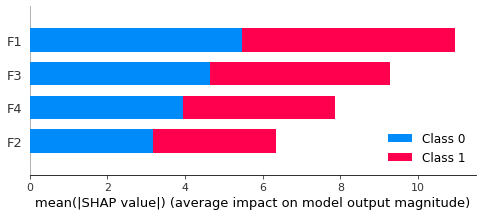

In [14]:
shap.summary_plot(shap_values, X_shap)

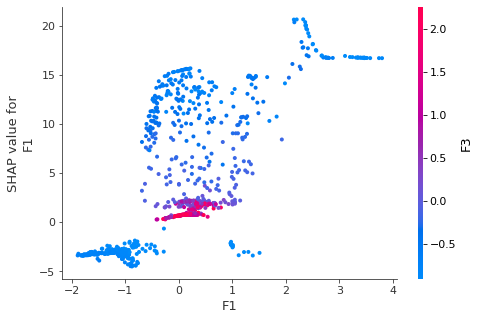

In [15]:
shap.dependence_plot('F1', shap_values[1], X_shap)